# **Module**: Univariate Statistical Process Monitoring
## **Lecture**: Limitations of Classical Control Charts
### *Topic*:  High FAR with Shewhart control chart for autocorrelated signal

In [44]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

> ##### generate an autocorrelated signal to train a Shewhart chart

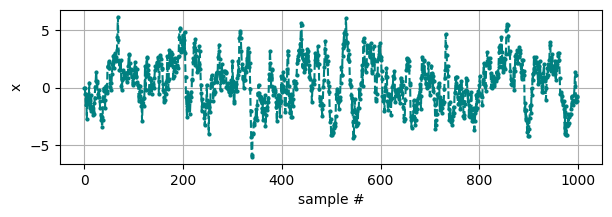

In [45]:
# generate autocorrelated NOC data
np.random.seed(1)
N = 1000
e1 = np.random.normal(loc=0, scale=1, size=N)

x_train = np.zeros((N,))
for k in range(2,N):
    x_train[k] = 0.9*x_train[k-1] + e1[k]

plt.figure(figsize=(7,2))
plt.plot(x_train,'--', marker='o', markersize=2, color='teal')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()


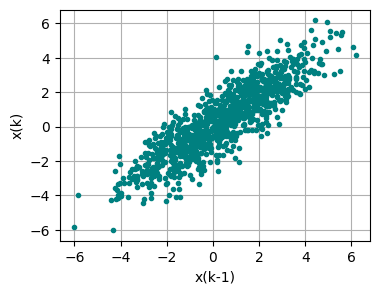

In [46]:
# plot xk vs xk-1
plt.figure(figsize=(4,3))
plt.plot(x_train[0:-1], x_train[1:], '.', color='teal')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.grid()
plt.show()

> ##### we will use the data generated above to estimate the Shewhart control chart parameters, which are the mean (mu) and standard deviation (sigma) of the signal

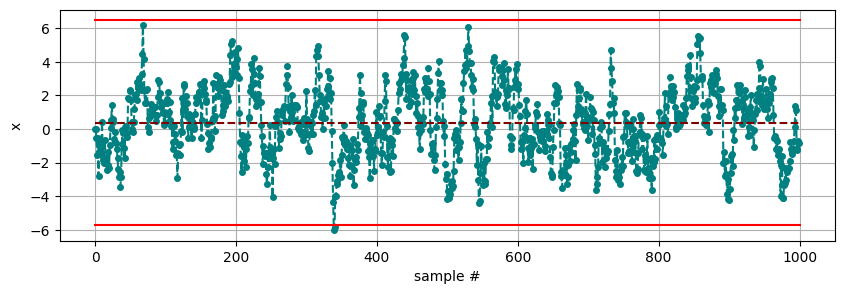

In [47]:
# estimate Shewhart model parameters and plot control chart
mu, sigma = np.mean(x_train), np.std(x_train)
UCL, LCL = mu + 3*sigma, mu - 3*sigma

plt.figure(figsize=(10,3))
plt.plot(x_train,'--',marker='o', markersize=4, color='teal')
plt.plot([0,N], [UCL,UCL], color='red')
plt.plot([0,N], [LCL,LCL], color='red')
plt.plot([0,N], [mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()

> ##### generate another autocorrelated signal to test the Shewhart chart performance

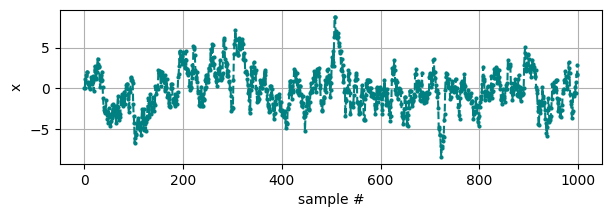

In [48]:
#%% generate test data
np.random.seed(100)
e2 = np.random.normal(loc=0, scale=1, size=N)

x_test = np.zeros((N,))
for k in range(2,N):
    x_test[k] = 0.9*x_test[k-1] + e2[k]

# control chart for faulty data
plt.figure(figsize=(7,2))
plt.plot(x_test,'--', marker='o', markersize=2, color='teal')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()

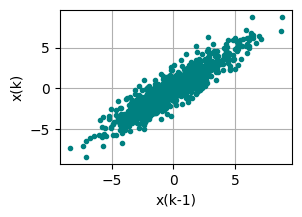

In [52]:
# plot xk vs xk-1
plt.figure(figsize=(3,2))
plt.plot(x_test[0:-1], x_test[1:], '.', color='teal')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.grid()
plt.show()

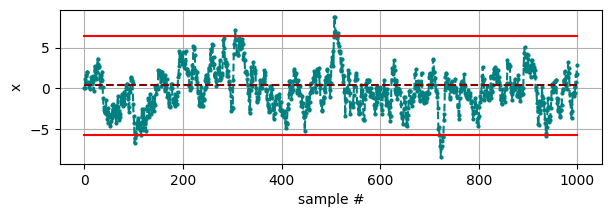

In [54]:
# plot control chart
plt.figure(figsize=(7,2))
plt.plot(x_test,'--',marker='o', markersize=2, color='teal')
plt.plot([0,N], [UCL,UCL], color='red')
plt.plot([0,N], [LCL,LCL], color='red')
plt.plot([0,N], [mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('x')
plt.grid()
plt.show()

In [50]:
out_of_control_flags = np.logical_or((x_test<LCL), (x_test>UCL))
N_out_of_control_predictions = np.sum(out_of_control_flags)
FAR = 100*N_out_of_control_predictions/N

print(f'FAR for NOC samples = {FAR}%')

FAR for NOC samples = 1.8%
